In [1]:
import mujoco_py

In [2]:
import os
mj_path = mujoco_py.utils.discover_mujoco()
xml_path = os.path.join(mj_path, 'model', 'humanoid.xml')
model = mujoco_py.load_model_from_path(xml_path)
sim = mujoco_py.MjSim(model)

In [3]:
print(sim.data.qpos)

[0.  0.  1.4 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [4]:
sim.step()
print(sim.data.qpos)

[-1.12164337e-05  7.29847036e-22  1.39975300e+00  9.99999999e-01
  1.80085466e-21  4.45933954e-05 -2.70143345e-20  1.30126513e-19
 -4.63561234e-05 -1.88020744e-20 -2.24492958e-06  4.79357124e-05
 -6.38208396e-04 -1.61130312e-03 -1.37554006e-03  5.54173825e-05
 -2.24492958e-06  4.79357124e-05 -6.38208396e-04 -1.61130312e-03
 -1.37554006e-03 -5.54173825e-05 -5.73572648e-05  7.63833991e-05
 -2.12765194e-05  5.73572648e-05 -7.63833991e-05 -2.12765194e-05]


In [66]:
#!/usr/bin/env python3
"""
Example of how bodies interact with each other. For a body to be able to
move it needs to have joints. In this example, the "robot" is a red ball
with X and Y slide joints (and a Z slide joint that isn't controlled).
On the floor, there's a cylinder with X and Y slide joints, so it can
be pushed around with the robot. There's also a box without joints. Since
the box doesn't have joints, it's fixed and can't be pushed around.
"""
from mujoco_py import load_model_from_xml, MjSim, MjViewer
import math
import os

MODEL_XML = """
<?xml version="1.0" ?>
<mujoco>
    <option timestep="0.005" />
    <worldbody>
        <body name="robot" pos="0 0 1.2">
            <joint axis="1 0 0" damping="0.1" name="slide0" pos="0 0 0" type="slide"/>
            <joint axis="0 1 0" damping="0.1" name="slide1" pos="0 0 0" type="slide"/>
            <joint axis="0 0 1" damping="1" name="slide2" pos="0 0 0" type="slide"/>
            <geom mass="1.0" pos="0 0 0" rgba="1 0 0 1" size="0.15" type="sphere"/>
			<camera euler="0 0 0" fovy="40" name="rgb" pos="0 0 2.5"></camera>
        </body>
        <body mocap="true" name="mocap" pos="0.5 0.5 0.5">
			<geom conaffinity="0" contype="0" pos="0 0 0" rgba="1.0 1.0 1.0 0.5" size="0.1 0.1 0.1" type="box"></geom>
			<geom conaffinity="0" contype="0" pos="0 0 0" rgba="1.0 1.0 1.0 0.5" size="0.2 0.2 0.05" type="box"></geom>
		</body>
        <body name="cylinder" pos="0.1 0.1 0.2">
            <geom mass="1" size="0.15 0.15" type="cylinder"/>
            <joint axis="1 0 0" name="cylinder:slidex" type="slide"/>
            <joint axis="0 1 0" name="cylinder:slidey" type="slide"/>
        </body>
        <body name="box" pos="-0.8 0 0.2">
            <geom mass="0.1" size="0.15 0.15 0.15" type="box"/>
        </body>
        <body name="floor" pos="0 0 0.025">
            <geom condim="3" size="1.0 1.0 0.02" rgba="0 1 0 1" type="box"/>
        </body>
    </worldbody>
    <actuator>
        <motor gear="2000.0" joint="slide0"/>
        <motor gear="2000.0" joint="slide1"/>
    </actuator>
</mujoco>
"""

model = load_model_from_xml(MODEL_XML)
sim = MjSim(model)
img = sim.render(600, 600)
t = 0
imgs = [img]
while True:
    sim.data.ctrl[0] = math.cos(t / 10.) * 0.01
    sim.data.ctrl[1] = math.sin(t / 10.) * 0.01
    t += 1
    sim.step()
    imgs.append(sim.render(600, 600))
    if t > 100:
        break

In [68]:
import numpy as np

In [69]:
from PIL import Image
ims = [Image.fromarray(np.flip(a_frame, axis=0)) for a_frame in imgs]
ims[0].save("try.gif", save_all=True, append_images=ims[1:], loop=0, duration=200)

In [2]:
from mujoco_py import load_model_from_path, MjSim, MjViewer
import os

model = load_model_from_path("~/.mujoco/mujoco210/model/tosser.xml")
sim = MjSim(model)
imgs = [sim.render(600, 600)]
sim_state = sim.get_state()


sim.set_state(sim_state)

for i in range(1000):
    if i < 150:
        sim.data.ctrl[:] = 0.0
    else:
        sim.data.ctrl[:] = -1.0
    sim.step()
    imgs.append(sim.render(600, 600))

Exception: Failed to load XML file: model/tosser.xml. mj_loadXML error: b'XML parse error at line 0, column 0:\nFailed to open file\n'

In [57]:
from swimmer import SwimmerEnv

In [58]:
env = SwimmerEnv()

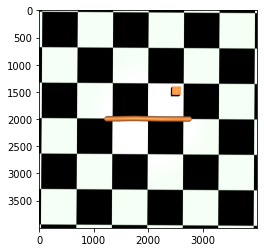

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(env.render('rgb_array', 4000, 4000))

In [60]:
env.sim.model.geom_id2name(2)

'track'

In [61]:
env.sim.data.qpos

array([-0.00011752, -0.00885351,  0.00649255, -0.02406456,  0.04311483])

In [62]:
env._get_obs()

array([-1.17518224e-04, -8.85351051e-03,  6.49255261e-03, -2.40645586e-02,
        4.31148277e-02, -1.14328158e-02, -4.31917394e-01,  3.16219069e-01,
       -1.17175380e+00,  2.09578481e+00])

In [64]:
env.action_space.shape

(2,)

In [70]:
import os
import mujoco_py
import numpy as np

PATH_TO_HUMANOID_XML = os.path.expanduser('~/.mujoco/mujoco210/model/humanoid.xml')

# Load the model and make a simulator
model = mujoco_py.load_model_from_path(PATH_TO_HUMANOID_XML)
sim = mujoco_py.MjSim(model)
imgs = [sim.render(600, 600)]

# Simulate 1000 steps so humanoid has fallen on the ground
for _ in range(10000):
    sim.step()
    if _ % 100 == 0:
        imgs.append(sim.render(600, 600))

print('number of contacts', sim.data.ncon)
for i in range(sim.data.ncon):
    # Note that the contact array has more than `ncon` entries,
    # so be careful to only read the valid entries.
    contact = sim.data.contact[i]
    print('contact', i)
    print('dist', contact.dist)
    print('geom1', contact.geom1, sim.model.geom_id2name(contact.geom1))
    print('geom2', contact.geom2, sim.model.geom_id2name(contact.geom2))
    # There's more stuff in the data structure
    # See the mujoco documentation for more info!
    geom2_body = sim.model.geom_bodyid[sim.data.contact[i].geom2]
    print(' Contact force on geom2 body', sim.data.cfrc_ext[geom2_body])
    print('norm', np.sqrt(np.sum(np.square(sim.data.cfrc_ext[geom2_body]))))
    # Use internal functions to read out mj_contactForce
    c_array = np.zeros(6, dtype=np.float64)
    print('c_array', c_array)
    mujoco_py.functions.mj_contactForce(sim.model, sim.data, i, c_array)
    print('c_array', c_array)

print('done')

number of contacts 0
done


NameError: name 'sim' is not defined